## Exercício Desafio

- Digamos que seu chefe pediu para você um relatório da análise dos salários da unidade de San Francisco da empresa. O objetivo dele é entender:

1. Qual foi a evolução do salário médio ao longo dos anos (TotalPay e TotalPayBenefits)
2. Quantos funcionários tivemos ao longo dos anos
3. Qual foi a evolução do total gasto com salário ao longo dos anos (TotalPayBenefits)

- Base de Dados a ser usada: salarios.sqlite

### Importação da Base de Dados

In [68]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conexao = sqlite3.connect('salarios.sqlite')

### Análise de Dados

In [69]:
# garantindo que estamos só com San Francisco

tabela_salarios = pd.read_sql('SELECT * FROM Salaries where Agency = "San Francisco"', conexao)


display(tabela_salarios)

print(tabela_salarios.info())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB
None


##### 1. Qual foi a evolução do salário médio ao longo dos anos

,TotalPay,TotalPayBenefits
Year,,
2011,71744.103871,71744.103871
2012,74113.262265,100553.229232
2013,77611.443142,101440.519714
2014,75463.918140,100250.918884


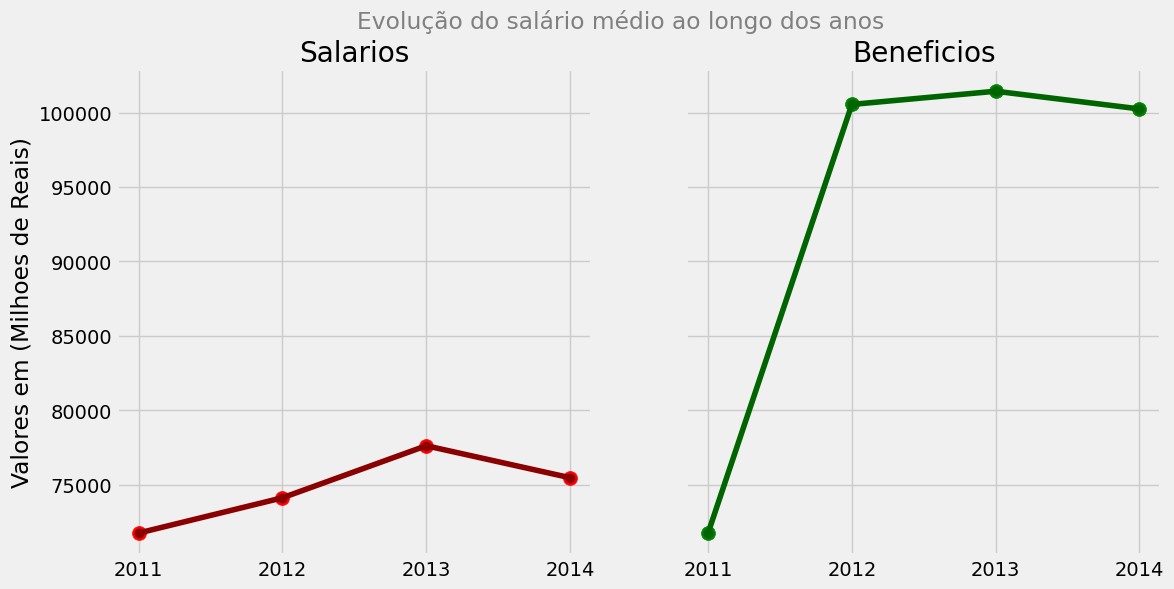

In [130]:
media_salario_anos = tabela_salarios.groupby('Year')[['TotalPay', 'TotalPayBenefits']].mean().reset_index()
media_salario_anos.set_index('Year', inplace=True)

plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)

axs[0].plot(media_salario_anos.index, media_salario_anos['TotalPay'], marker='o', color='darkred')
axs[0].set_xticks(media_salario_anos.index)
axs[0].set_ylabel('Valores em (Milhoes de Reais)')
axs[0].scatter(media_salario_anos.index, media_salario_anos['TotalPay'], color='red', s=100)
axs[0].set_title('Salarios')

axs[1].plot(media_salario_anos.index, media_salario_anos['TotalPayBenefits'], marker='o', color='darkgreen')
axs[1].scatter(media_salario_anos.index, media_salario_anos['TotalPayBenefits'], color='green', s=100)
axs[1].set_xticks(media_salario_anos.index)
axs[1].set_title('Beneficios')

fig.suptitle('Evolução do salário médio ao longo dos anos\n\n', color='gray')

display(media_salario_anos)

##### 2. Quantos funcionários tivemos ao longo dos anos

,Id
Year,
2011,36159
2012,36766
2013,37606
2014,38123


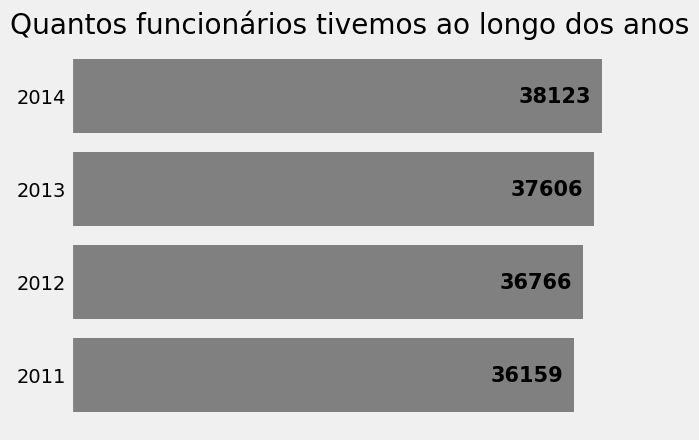

In [124]:
media_funcionarios_ano = tabela_salarios.groupby('Year')['Id'].count().reset_index()
media_funcionarios_ano.set_index('Year', inplace=True)

barras = plt.barh(media_funcionarios_ano.index, media_funcionarios_ano['Id'], color='grey')

plt.bar_label(barras, labels=media_funcionarios_ano['Id'], padding=-60, fontsize=15, fontweight='bold')

plt.xticks([])
plt.title('Quantos funcionários tivemos ao longo dos anos')
plt.grid(False)
plt.yticks(media_funcionarios_ano.index)
display(media_funcionarios_ano)

##### 3. Qual foi a evolução do total gasto com salário ao longo dos anos

,TotalPay,TotalPayBenefits
Year,,
2011,"R$2,594,195,051.88","R$2,594,195,051.88"
2012,"R$2,724,848,200.44","R$3,696,940,025.96"
2013,"R$2,918,655,930.80","R$3,814,772,184.37"
2014,"R$2,876,910,951.26","R$3,821,865,780.60"


Text(0.5, 1.0, 'Beneficios')

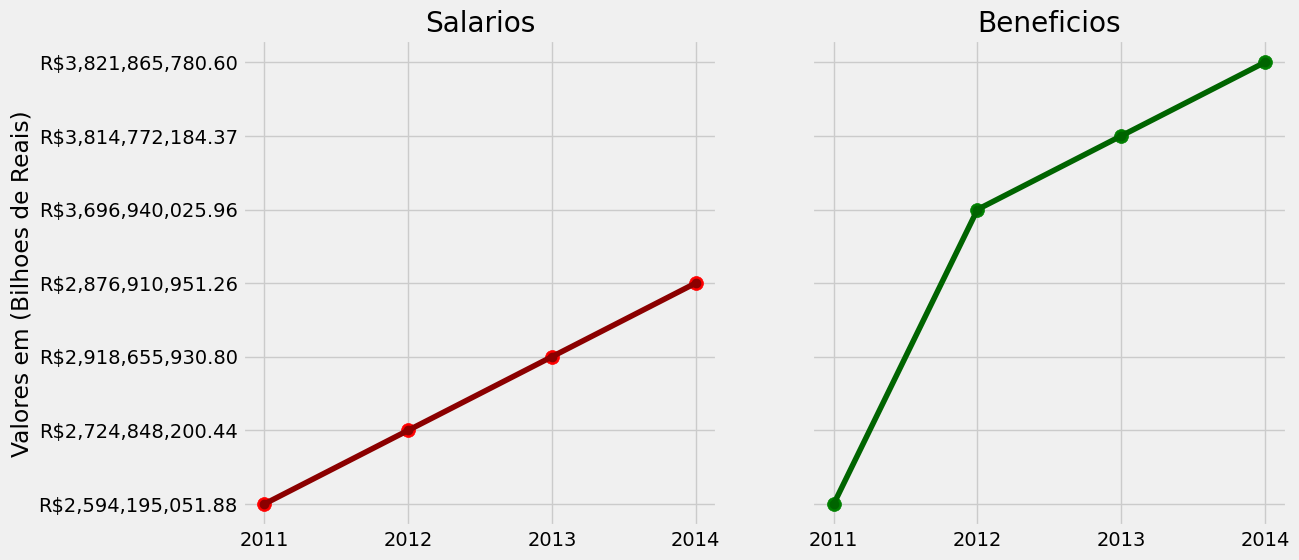

In [126]:
def formatar(valor):
    return 'R${:,.2f}'.format(valor)



tabela_total = tabela_salarios.groupby("Year")[["TotalPay", "TotalPayBenefits"]].sum()
tabela_total["TotalPay"] = tabela_total["TotalPay"].apply(formatar)
tabela_total["TotalPayBenefits"] = tabela_total["TotalPayBenefits"].apply(formatar)
display(tabela_total)


plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), sharey=True)

axs[0].plot(tabela_total.index, tabela_total['TotalPay'], marker='o', color='darkred')
axs[0].set_xticks(tabela_total.index)
axs[0].set_ylabel('Valores em (Bilhoes de Reais)')
axs[0].scatter(tabela_total.index, tabela_total['TotalPay'], color='red', s=100)
axs[0].set_title('Salarios')

axs[1].plot(tabela_total.index, tabela_total['TotalPayBenefits'], marker='o', color='darkgreen')
axs[1].scatter(tabela_total.index, tabela_total['TotalPayBenefits'], color='green', s=100)
axs[1].set_xticks(tabela_total.index)
axs[1].set_title('Beneficios')

graficos:

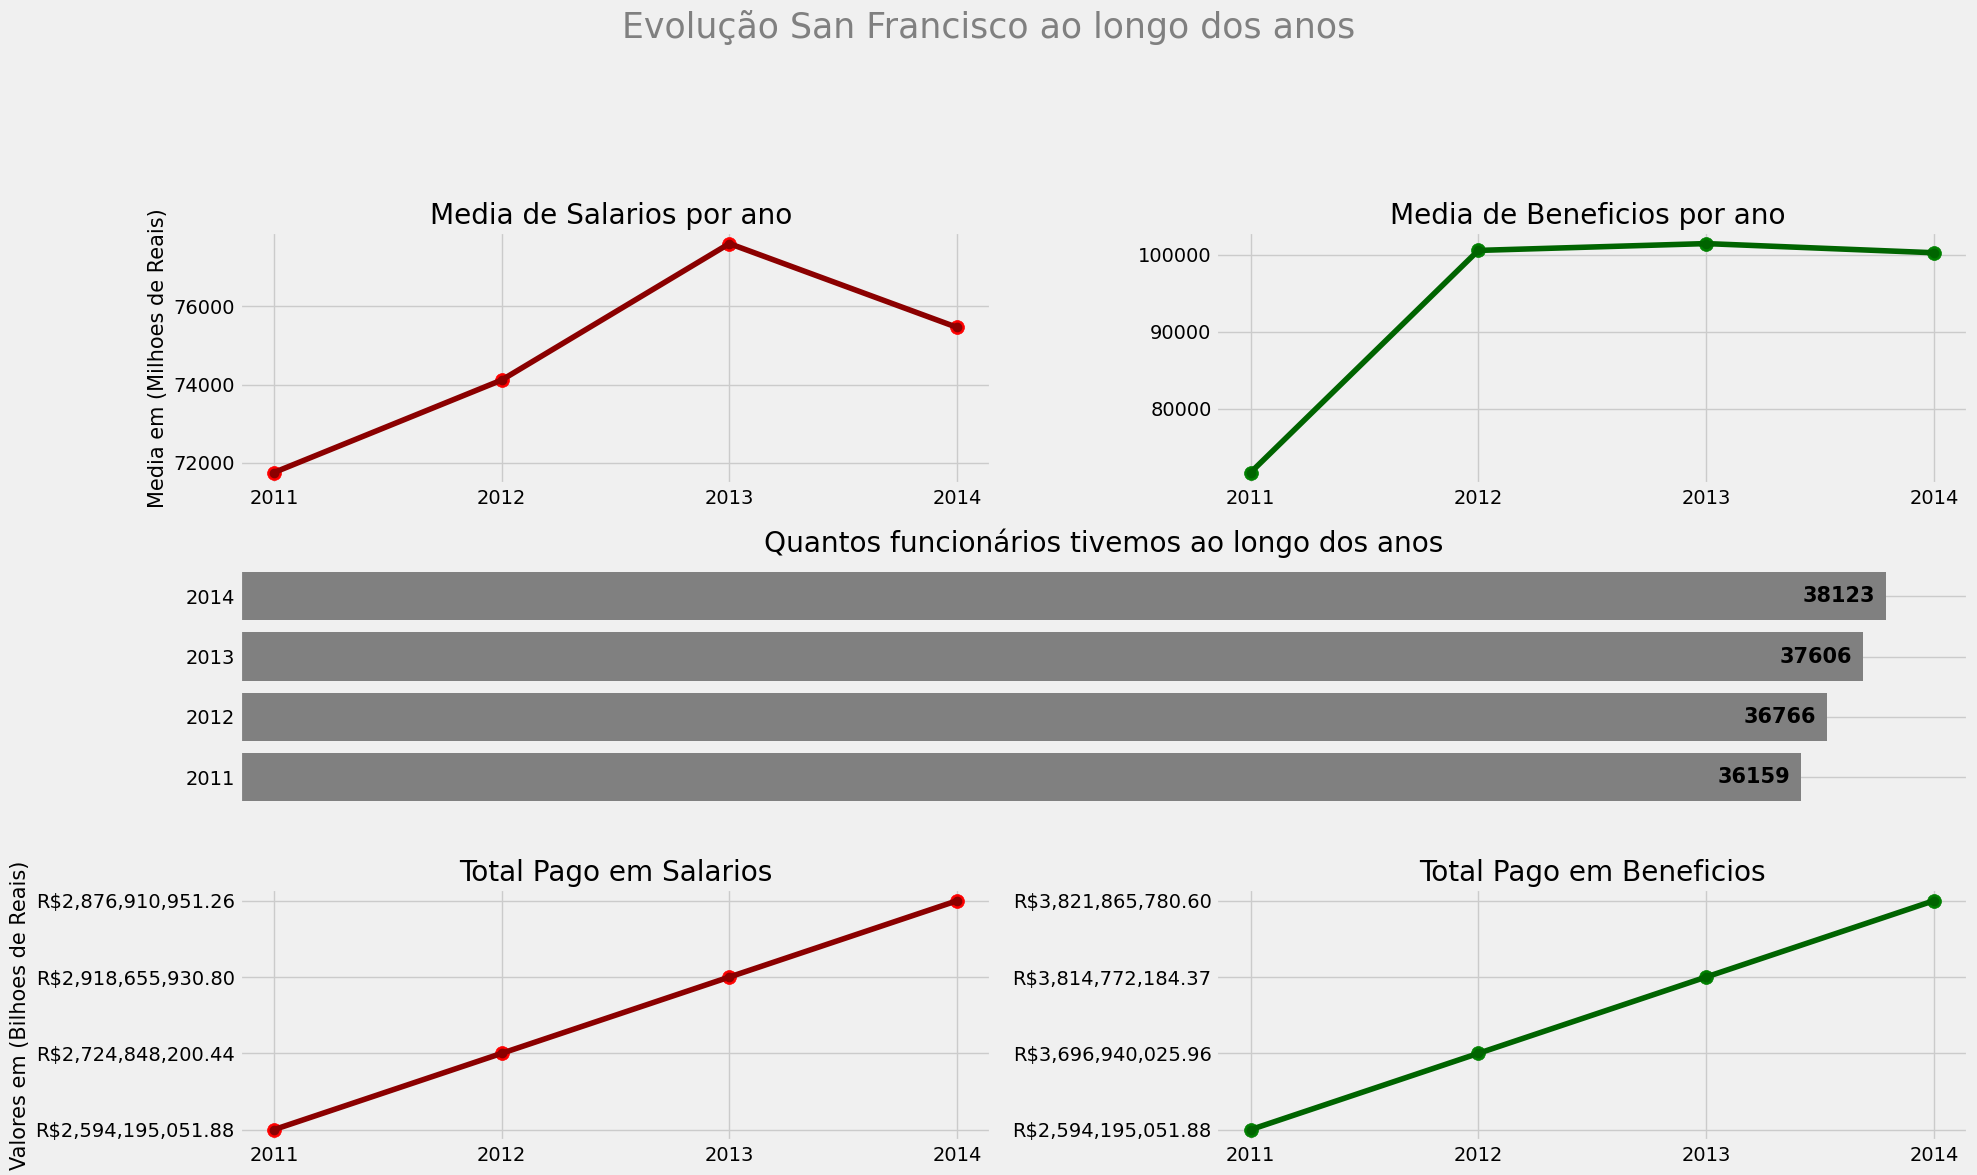

In [160]:
from matplotlib.ticker import FuncFormatter
mosaico = 'AB;CC;DE'
fig, axs = plt.subplot_mosaic(mosaic=mosaico, figsize=(20,12))
def formatar_bilhoes(x, _):
    return f'R${x/1e9:,.2f} bi'


axs['A'].plot(media_salario_anos.index, media_salario_anos['TotalPay'], marker='o', color='darkred')
axs['A'].set_xticks(media_salario_anos.index)
axs['A'].set_ylabel('Media em (Milhoes de Reais)', fontsize=15)
axs['A'].scatter(media_salario_anos.index, media_salario_anos['TotalPay'], color='red', s=100)
axs['A'].set_title('Media de Salarios por ano ')

axs['B'].plot(media_salario_anos.index, media_salario_anos['TotalPayBenefits'], marker='o', color='darkgreen')
axs['B'].scatter(media_salario_anos.index, media_salario_anos['TotalPayBenefits'], color='green', s=100)
axs['B'].set_xticks(media_salario_anos.index)
axs['B'].set_title('Media de Beneficios por ano ')


barras = axs['C'].barh(media_funcionarios_ano.index, media_funcionarios_ano['Id'], color='grey')

axs['C'].bar_label(barras, labels=media_funcionarios_ano['Id'], padding=-60, fontsize=15, fontweight='bold')

axs['C'].set_xticks([])
axs['C'].set_title('Quantos funcionários tivemos ao longo dos anos')

axs['C'].set_yticks(media_funcionarios_ano.index)



axs['D'].plot(tabela_total.index, tabela_total['TotalPay'], marker='o', color='darkred')
axs['D'].set_xticks(tabela_total.index)
axs['D'].set_ylabel('Valores em (Bilhoes de Reais)', fontsize=15)
axs['D'].scatter(tabela_total.index, tabela_total['TotalPay'], color='red', s=100)
axs['D'].set_title('Total Pago em Salarios')


axs['E'].plot(tabela_total.index, tabela_total['TotalPayBenefits'], marker='o', color='darkgreen')
axs['E'].scatter(tabela_total.index, tabela_total['TotalPayBenefits'], color='green', s=100)
axs['E'].set_xticks(tabela_total.index)
axs['E'].set_title('Total Pago em Beneficios')

fig.suptitle('Evolução San Francisco ao longo dos anos\n\n', color='gray', fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()